In [ ]:
!pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.15 requires scipy>=1.10.0, but you have scipy 1.9.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.


## 가. Loading data

- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### 독립변수:
- age (숫자형): 나이
- job: 직업 유형 (범주형: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: 결혼 상태 (범주형: 'divorced','married','single','unknown'; 참고: 'divorced'는 이혼 또는 사별을 의미함)
- education: 교육 수준 (범주형: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: 연체된 대출이 있는지 여부 (범주형: 'no','yes','unknown')
- housing: 주택 대출이 있는지 여부 (범주형: 'no','yes','unknown')
- loan: 개인 대출이 있는지 여부 (범주형: 'no','yes','unknown')
- contact: 연락 방식 (범주형: 'cellular','telephone')
- month: 마지막 연락 월 (범주형: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: 마지막 연락 요일 (범주형: 'mon','tue','wed','thu','fri')
- duration: 마지막 연락 시간(초 단위, 숫자형).
    - 중요한 주의사항: 이 속성은 출력(target)에 큰 영향을 미침 (예: duration=0이면 y='no'). 그러나 통화가 이루어지기 전에는 duration을 알 수 없고, 통화가 끝나면 y값은 명확해짐. 따라서 이 속성은 벤치마크 목적으로만 포함되어야 하며, 현실적인 예측 모델을 만들 때는 제외해야 함.
- campaign: 이번 캠페인에서 해당 고객에게 이루어진 연락 횟수 (숫자형, 마지막 연락 포함)
- pdays: 이전 캠페인에서 고객에게 마지막으로 연락한 후 경과한 일수 (숫자형; 999는 이전에 연락하지 않은 경우를 의미)
- previous: 이번 캠페인 전에 해당 고객에게 이루어진 연락 횟수 (숫자형)
- poutcome: 이전 마케팅 캠페인의 결과 (범주형: 'failure','nonexistent','success')

### 종속변수(target, 예측 대상):
- y: 고객이 정기 예금을 신청했는지 여부 (이진형: 'yes','no')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pycaret
from pycaret.classification import *

warnings.filterwarnings('ignore')

In [ ]:
import matplotlib

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)
print(pycaret.__version__)

2.1.4
1.25.2
0.13.1
3.7.1
3.3.2


In [ ]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# 'duration' 컬럼 버리기(drop)
df.drop('duration', axis=1, inplace=True) # duration은 사후에 기록된 컬럼이기 때문에, 앞으로의 예측에서는 수집할 수 없는 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [ ]:
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
s = setup(df, target ='deposit', session_id = 1, data_split_stratify=True, train_size= 0.9)

,Description,Value
0,Session id,1
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(11162, 16)"
5,Transformed data shape,"(11162, 48)"
6,Transformed train set shape,"(10045, 48)"
7,Transformed test set shape,"(1117, 48)"
8,Numeric features,6
9,Categorical features,9


In [ ]:
top5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7404,0.7943,0.7404,0.7468,0.7367,0.4741,0.4831,1.1810
gbc,Gradient Boosting Classifier,0.7355,0.7894,0.7355,0.7437,0.7309,0.4636,0.4746,1.8510
xgboost,Extreme Gradient Boosting,0.7272,0.7843,0.7272,0.7297,0.7249,0.4490,0.4535,0.5540
rf,Random Forest Classifier,0.7242,0.7792,0.7242,0.7259,0.7223,0.4434,0.4468,1.8470
ada,Ada Boost Classifier,0.7138,0.7718,0.7138,0.7192,0.7095,0.4201,0.4285,0.7910
ridge,Ridge Classifier,0.6992,0.7581,0.6992,0.7054,0.6939,0.3898,0.3994,0.3110
lda,Linear Discriminant Analysis,0.6991,0.7581,0.6991,0.7053,0.6938,0.3896,0.3992,0.5240
lr,Logistic Regression,0.6988,0.7566,0.6988,0.7026,0.6948,0.3902,0.3968,2.4770
et,Extra Trees Classifier,0.6987,0.7522,0.6987,0.6988,0.6974,0.3929,0.3944,1.9350
nb,Naive Bayes,0.6833,0.7387,0.6833,0.6944,0.6743,0.3554,0.3709,0.3130


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
top5

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=1, subsample=1.0, tol=0.0001,
                            val

In [ ]:
tuned_top5 = [tune_model(i) for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7403,0.7949,0.7403,0.7440,0.7377,0.4749,0.4807
1,0.7274,0.7804,0.7274,0.7315,0.7242,0.4483,0.4549
2,0.7483,0.8095,0.7483,0.7508,0.7463,0.4916,0.4959
3,0.7174,0.7751,0.7174,0.7231,0.7132,0.4273,0.4359
4,0.6995,0.7587,0.6995,0.7028,0.6959,0.3918,0.3978
5,0.7301,0.8031,0.7301,0.7324,0.7279,0.4549,0.4591
6,0.7042,0.7683,0.7042,0.7062,0.7016,0.4024,0.4066
7,0.7480,0.7994,0.7480,0.7512,0.7458,0.4909,0.4960
8,0.7311,0.7925,0.7311,0.7337,0.7288,0.4568,0.4614


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7443,0.8030,0.7443,0.7516,0.7404,0.4817,0.4916
1,0.7403,0.7972,0.7403,0.7485,0.7359,0.4733,0.4843
2,0.7532,0.8104,0.7532,0.7581,0.7505,0.5008,0.5077
3,0.7303,0.7712,0.7303,0.7403,0.7249,0.4525,0.4656
4,0.7144,0.7684,0.7144,0.7214,0.7095,0.4207,0.4309
5,0.7311,0.8000,0.7311,0.7394,0.7263,0.4546,0.4658
6,0.7161,0.7770,0.7161,0.7233,0.7112,0.4244,0.4346
7,0.7560,0.8131,0.7560,0.7635,0.7524,0.5057,0.5157
8,0.7341,0.7985,0.7341,0.7376,0.7314,0.4624,0.4681


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7085,0.7880,0.7085,0.7129,0.7084,0.4188,0.4215
1,0.6905,0.7662,0.6905,0.6931,0.6907,0.3820,0.3833
2,0.7035,0.7946,0.7035,0.7100,0.7031,0.4098,0.4140
3,0.6905,0.7579,0.6905,0.6959,0.6903,0.3836,0.3868
4,0.6647,0.7362,0.6647,0.6693,0.6645,0.3318,0.3342
5,0.7052,0.7775,0.7052,0.7090,0.7052,0.4119,0.4142
6,0.6793,0.7654,0.6793,0.6832,0.6792,0.3604,0.3625
7,0.7151,0.7887,0.7151,0.7197,0.7150,0.4322,0.4350
8,0.7012,0.7851,0.7012,0.7106,0.7002,0.4063,0.4129


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7045,0.7625,0.7045,0.7130,0.6983,0.3998,0.4119
1,0.7065,0.7600,0.7065,0.7209,0.6978,0.4022,0.4208
2,0.7174,0.7860,0.7174,0.7263,0.7118,0.4262,0.4385
3,0.6856,0.7278,0.6856,0.6979,0.6762,0.3595,0.3764
4,0.6826,0.7308,0.6826,0.6939,0.6734,0.3537,0.3695
5,0.6942,0.7513,0.6942,0.7010,0.6884,0.3795,0.3899
6,0.7092,0.7391,0.7092,0.7232,0.7009,0.4081,0.4261
7,0.7311,0.7917,0.7311,0.7486,0.7231,0.4524,0.4737
8,0.7062,0.7594,0.7062,0.7153,0.6999,0.4033,0.4160


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6896,0.7576,0.6896,0.6907,0.6871,0.3730,0.3763
1,0.7015,0.7452,0.7015,0.7156,0.6926,0.3920,0.4104
2,0.7035,0.7730,0.7035,0.7216,0.6930,0.3951,0.4178
3,0.6667,0.7119,0.6667,0.6857,0.6516,0.3183,0.3430
4,0.6507,0.7027,0.6507,0.6600,0.6396,0.2882,0.3028
5,0.6912,0.7371,0.6912,0.6987,0.6849,0.3732,0.3843
6,0.6773,0.7210,0.6773,0.6817,0.6720,0.3458,0.3537
7,0.7022,0.7699,0.7022,0.7212,0.6913,0.3925,0.4160
8,0.6763,0.7394,0.6763,0.6781,0.6729,0.3455,0.3500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_top5

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=1, subsample=1.0, tol=0.0001,
                            val

In [ ]:
blender_top5 = blend_models(estimator_list=tuned_top5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7622,0.8138,0.7622,0.7678,0.7594,0.5187,0.5265
1,0.7403,0.7973,0.7403,0.7467,0.7366,0.4739,0.4828
2,0.7662,0.8181,0.7662,0.7699,0.7641,0.5275,0.5330
3,0.7234,0.7779,0.7234,0.7294,0.7192,0.4394,0.4483
4,0.7224,0.7743,0.7224,0.7282,0.7183,0.4375,0.4461
5,0.7361,0.8072,0.7361,0.7407,0.7329,0.4660,0.4730
6,0.7271,0.7729,0.7271,0.7340,0.7227,0.4469,0.4567
7,0.7699,0.8172,0.7699,0.7763,0.7671,0.5344,0.5428
8,0.7450,0.8073,0.7450,0.7493,0.7423,0.4844,0.4908


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

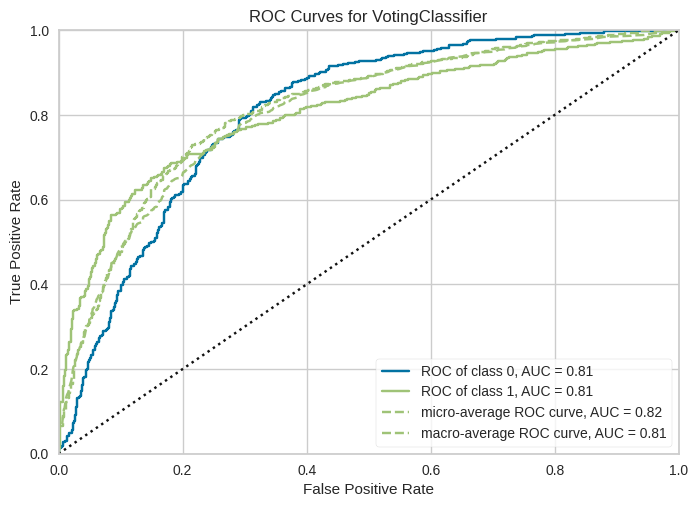

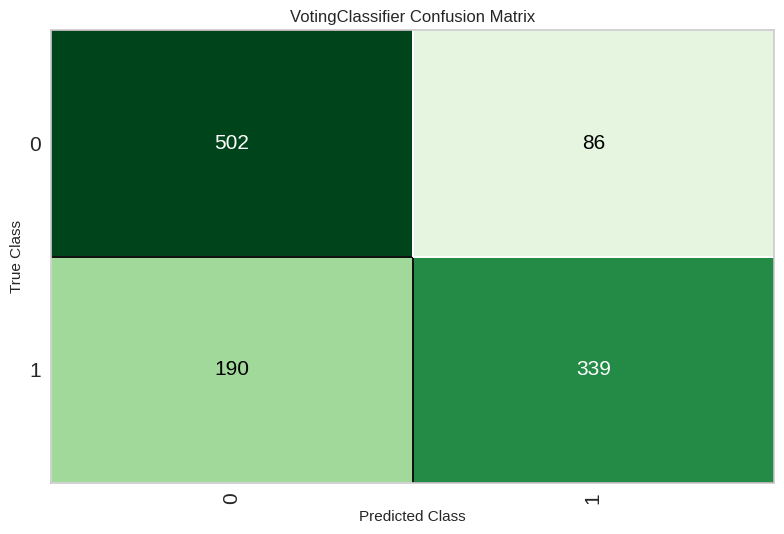

In [ ]:
plot_model(estimator = blender_top5, plot = 'auc')
plot_model(estimator = blender_top5, plot = 'confusion_matrix')

Feature Importance - Model LGBMClassifier


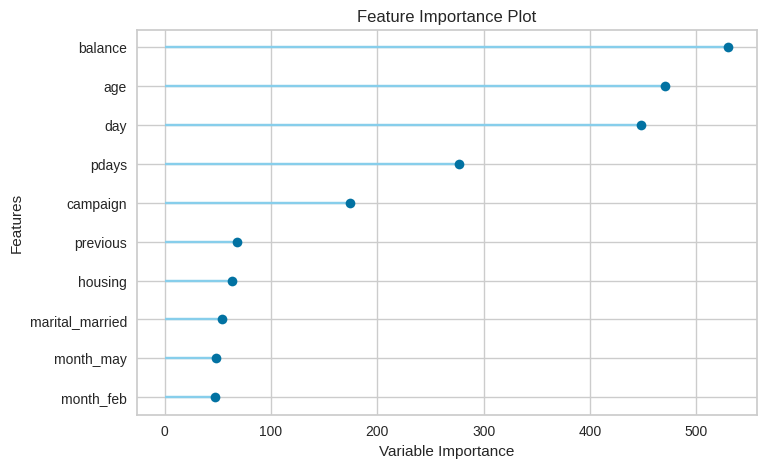

Feature Importance - Model GradientBoostingClassifier


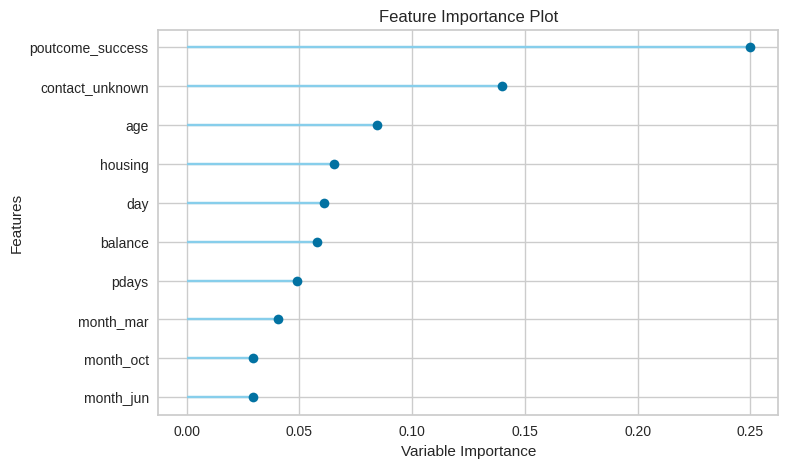

Feature Importance - Model XGBClassifier


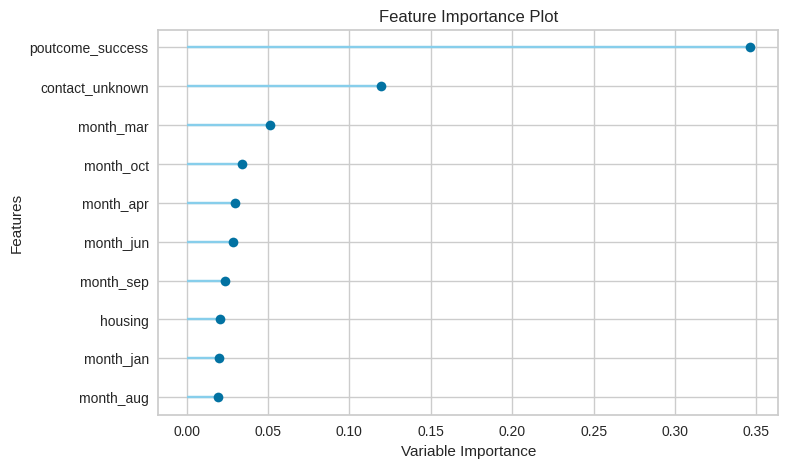

Feature Importance - Model RandomForestClassifier


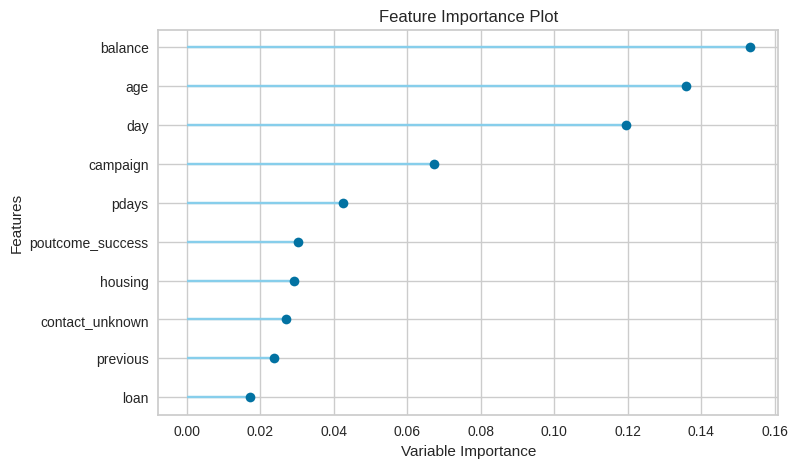

Feature Importance - Model AdaBoostClassifier


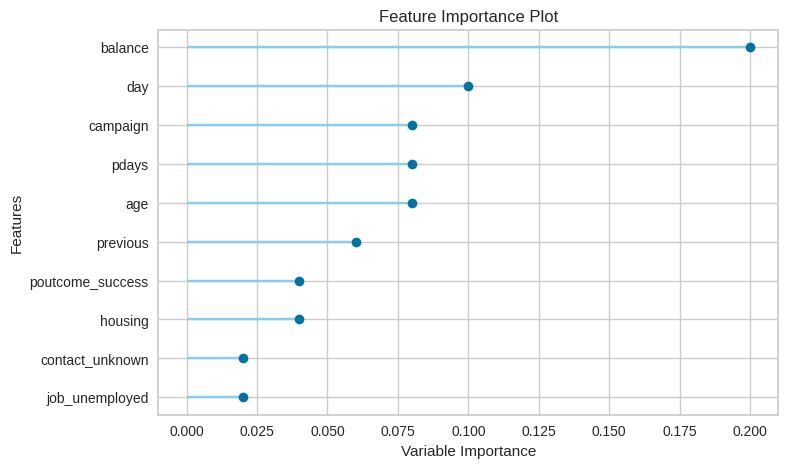

In [ ]:
# 각 모델에 대해 feature 중요도 시각화 수행
for model in tuned_top5:
    print(f"Feature Importance - Model {type(model).__name__}")
    plot_model(model, plot='feature')
    plt.show()

In [ ]:
evaluate_model(blender_top5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Parameters').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)